In [40]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import yfinance as yf
import statsmodels.api as sm

In [41]:
def performance(long, n1, longstart, longend, short, n2, shortstart, shortend):

    rawlong = yf.download(long, start = longstart, end = longend)
    rawshort = yf.download(short, start = shortstart, end = shortend)
    
    portfolio = pd.concat([rawlong['Adj Close'], 
                  rawshort['Adj Close']], axis = 1, sort = False)
    portfolio.columns = [long, short]
    
    portfolio[long + ' Returns'] = rawlong['Adj Close'].sub(rawlong['Adj Close'].iloc[0]).mul(n1)
    portfolio[long + ' Percent Returns'] = portfolio[long + ' Returns'].div(n1).div(rawlong['Adj Close'].iloc[0]).mul(100)
    portfolio[short + ' Returns'] = rawshort['Adj Close'].sub(rawshort['Adj Close'].iloc[0]).mul(-1).mul(n2)
    portfolio[short + ' Percent Returns'] = portfolio[short + ' Returns'].div(n2).div(rawshort['Adj Close'].iloc[0]).mul(100)
    portfolio['Principle long'] = rawlong['Adj Close'].sub(rawlong['Adj Close']).add(rawlong['Adj Close'].iloc[0]).mul(n1)
    portfolio['Principle short'] = rawshort['Adj Close'].sub(rawshort['Adj Close']).add(rawshort['Adj Close'].iloc[0]).mul(n2)
    portfolio = portfolio.replace(np.nan, 0, regex=True)
    portfolio['Principle'] = portfolio['Principle long'].add(portfolio['Principle short'])
    portfolio['Total Return'] = portfolio[long + ' Returns'].add(portfolio[short + ' Returns'])
    portfolio['Total Percentage Return'] = portfolio['Total Return'].div(portfolio['Principle']).mul(100)
    
    del portfolio['Principle long']
    del portfolio['Principle short']
    del portfolio['Principle']
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,7))

    ax1.set_ylabel('Percent Returns')
    ax1.set_xlabel('Date')
    ax1.plot(portfolio['Total Percentage Return'], label = 'Total Return', color = 'red')
    ax1.plot(portfolio[long + ' Percent Returns'], label = long + ' Return', color = 'blue')
    ax1.plot(portfolio[short + ' Percent Returns'], label = short + ' Return', color = 'green')
    ax1.legend(loc='best')
    
    ax2.set_ylabel('Returns')
    ax2.set_xlabel('Date')
    ax2.plot(portfolio['Total Return'], label = 'Total Return', color = 'red')
    ax2.plot(portfolio[long + ' Returns'], label = long + ' Return', color = 'blue')
    ax2.plot(portfolio[short + ' Returns'], label = short + ' Return', color = 'green')
    ax2.legend(loc='best')
    plt.title('Returns')
    
    return portfolio.tail(10)
#To work on later adding volatility of the portfolio and graph it

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,ZLAB,WFC,ZLAB Returns,ZLAB Percent Returns,WFC Returns,WFC Percent Returns,Total Return,Total Percentage Return
Date,,,,,,,,
2020-10-16,90.440002,22.755522,622.600021,220.936840,292.874237,44.580048,915.474258,97.519252
2020-10-19,87.470001,22.436985,592.900009,210.397446,297.970825,45.355829,890.870834,94.898417
2020-10-20,87.540001,22.705750,593.600006,210.645848,293.670593,44.701266,887.270599,94.514908
2020-10-21,85.089996,22.596254,569.099960,201.951723,295.422516,44.967936,864.522476,92.091705
2020-10-22,86.690002,23.143740,585.100021,207.629530,286.662750,43.634563,871.762772,92.862965
2020-10-23,87.199997,23.173603,590.199966,209.439304,286.184937,43.561832,876.384903,93.355329
2020-10-26,85.230003,22.596254,570.500031,202.448554,295.422516,44.967936,865.922546,92.240845
2020-10-27,88.489998,21.720274,603.099976,214.017022,309.438202,47.101343,912.538177,97.206492
2020-10-28,84.500000,21.083200,563.199997,199.858052,319.631378,48.652904,882.831375,94.042028


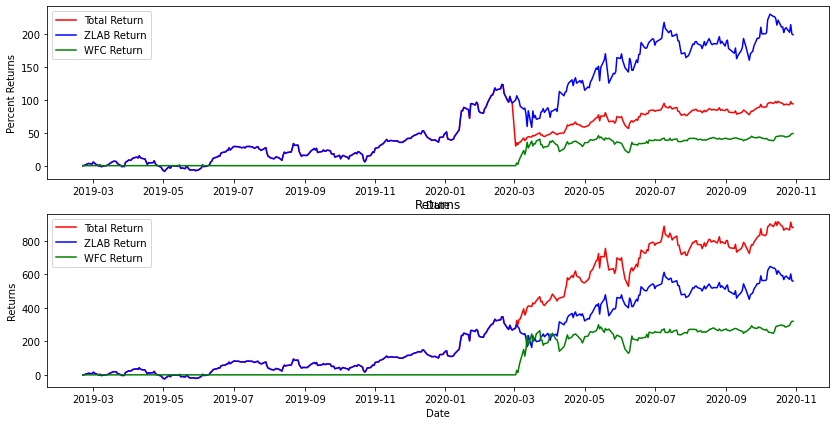

In [42]:

performance('ZLAB', 10, '2019-02-20', '2020-10-30', 'WFC', 16, '2020-03-01', '2020-10-30')